In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types



Welcome to JupyROOT 6.26/04


In [2]:

base_file_loc = '/media/jykim/T7/storage_b2/storage//massvetov2_pre_1ab_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlybkg/'
# base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_optimzed_sigext_1ab_bkg/'


phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [3]:
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
# base_filter=' D0_M>1.8 && D0_M<1.9 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.00075 && Dstarp_CMS_p>2.5 && gamma_E>0.34 && Belle2Pi0Veto_75MeV>0.021'

# base_filter=' D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.68 && D0_M<2.05 && Belle2Pi0Veto_75MeV>0.021'
base_filter=' D0_M>1.68 && D0_M<2.05'

# 
variables=['__experiment__', '__run__', '__event__','__ncandidates__','__candidate__','D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p','gamma_E','gamma_genMotherPDG','Dstarp_isSignal','Dstarp_delM','D0_flightDistance','D0_flightDistanceErr']
# variables+=['Pi0_Prob','Eta_Prob']
# variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
#             'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
#             'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
#             'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
#             'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
#             'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
#             'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','Belle2Pi0Veto_mask','gamma_genMotherPDG']
# variables+=['phi_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
              'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV']
tree='antiKstar'

In [4]:

# file_ccbar = []
# file_uubar = []
# file_ddbar = []
# file_ssbar = []
# file_charged = []
# file_mixed = []
# file_taupair = []

# for i in range(1,193):
#     file_loc = base_file_loc + 'ccbar/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_ccbar.append(file_loc)
    
# for i in range(1,59):
#     file_loc = base_file_loc + 'uubar/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_uubar.append(file_loc)
    
# for i in range(1,18):
#     file_loc = base_file_loc + 'ddbar/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_ddbar.append(file_loc)
# for i in range(1,10):
#     file_loc = base_file_loc + 'ssbar/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_ssbar.append(file_loc)
# for i in range(1,13):
#     file_loc = base_file_loc + 'charged/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_charged.append(file_loc)
# for i in range(1,14):
#     file_loc = base_file_loc + 'mixed/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_mixed.append(file_loc)
# for i in range(1,8):
#     file_loc = base_file_loc + 'taupair/recon_udst_' + str(i).zfill(6) + '_.root'
#     file_taupair.append(file_loc)
    

# base_filter = base_filter
# varaiables = variables
# tree=tree

# pd_ccbar = get_pd(file=file_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_uubar = get_pd(file=file_uubar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ddbar = get_pd(file=file_ddbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_ssbar = get_pd(file=file_ssbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_charged = get_pd(file=file_charged, tree=tree,base_filter=base_filter,variables=variables)
# pd_mixed = get_pd(file=file_mixed, tree=tree,base_filter=base_filter,variables=variables)
# pd_taupair = get_pd(file=file_taupair, tree=tree,base_filter=base_filter,variables=variables)


In [5]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [6]:
pd_ccbar = pd_phigamma_ccbar.reset_index(drop=True)
pd_uubar = pd_phigamma_uubar.reset_index(drop=True)
pd_ddbar = pd_phigamma_ddbar.reset_index(drop=True)
pd_ssbar = pd_phigamma_ssbar.reset_index(drop=True)
pd_charged = pd_phigamma_charged.reset_index(drop=True)
pd_mixed = pd_phigamma_mixed.reset_index(drop=True)
pd_taupair = pd_phigamma_taupair.reset_index(drop=True)




In [7]:
numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 
print(numerator)
print(denominator)

multiplicity = numerator/denominator
print(multiplicity)

2641581
3190910
0.8278456615824326


In [8]:
# def cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair):
#     pd_ccbar_after = pd_ccbar.query(cut)
#     pd_uubar_after = pd_uubar.query(cut)
#     pd_ddbar_after = pd_ddbar.query(cut)
#     pd_ssbar_after = pd_ssbar.query(cut)
#     pd_charged_after = pd_charged.query(cut)
#     pd_mixed_after = pd_mixed.query(cut)
#     pd_taupair_after = pd_taupair.query(cut)

#     return pd_ccbar_after, pd_uubar_after , pd_ddbar_after , pd_ssbar_after , \
#         pd_charged_after , pd_mixed_after , pd_taupair_after

In [9]:
cut = 'gamma_E>0.48'
cut = 'gamma_E>0.48 & Belle2Pi0Veto_75MeV >0.022'

cut = 'gamma_E>0.0'

# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001  '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

[91785. 92186. 92054. 91544. 92130. 92100. 91378. 91431. 90880. 91303.
 90854. 91258. 90450. 90846. 91043. 90043. 89799. 89155. 87786. 86669.
 84320. 80235. 74729. 67097. 58548. 51268. 46002. 43763. 42948. 42254.
 42453. 41240. 41334. 41183. 40788. 40191. 40185. 39846. 39556. 39390.
 39282. 38849. 38579. 38292. 38144. 37593. 37528. 37160. 36992. 36467.]
fitst_bin_entries=91785.0


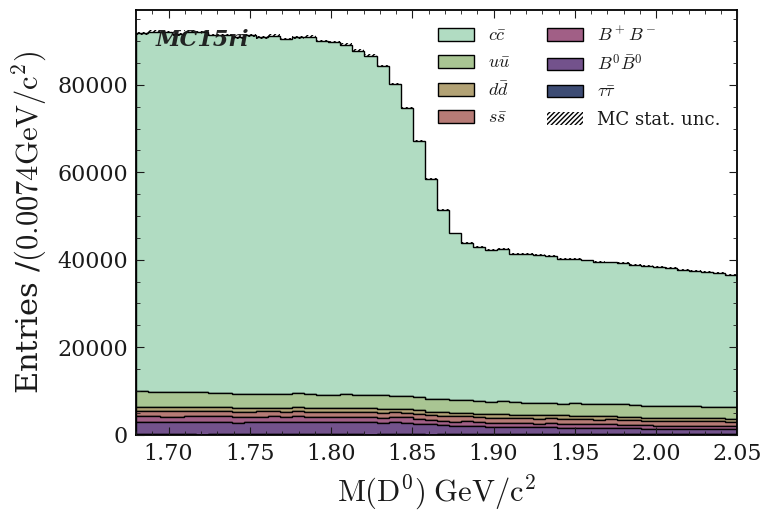

In [10]:
labels = [ r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  


scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)

nbins = 50
xlabel = "$\mathrm{M(D^0)}$"

MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")
plt.savefig("MC15ri_antiKstar_1ab_optimized_D0.png")

[91785. 92186. 92054. 91544. 92130. 92100. 91378. 91431. 90880. 91303.
 90854. 91258. 90450. 90846. 91043. 90043. 89799. 89155. 87786. 86669.
 84320. 80235. 74729. 67097. 58548. 51268. 46002. 43763. 42948. 42254.
 42453. 41240. 41334. 41183. 40788. 40191. 40185. 39846. 39556. 39390.
 39282. 38849. 38579. 38292. 38144. 37593. 37528. 37160. 36992. 36467.]
fitst_bin_entries=91785.0


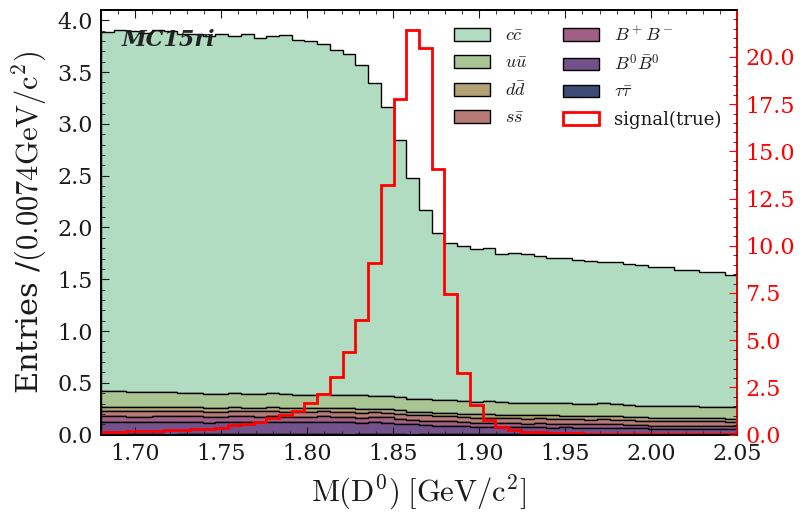

In [11]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'D0_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (1.68,2.05)
# xrange = (1.8,1.9)
nbins = 50
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


half_1_sigMC = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
base_filter+=' && Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')

fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

[5.80781e+05 3.47743e+05 2.09517e+05 1.40629e+05 1.06870e+05 8.73350e+04
 7.56830e+04 6.76990e+04 6.32090e+04 5.80430e+04 5.51370e+04 5.41270e+04
 5.22830e+04 5.10630e+04 5.05690e+04 5.06790e+04 5.05020e+04 4.97370e+04
 4.98070e+04 4.97290e+04 5.01010e+04 4.98290e+04 4.92960e+04 4.90570e+04
 4.89260e+04 4.74790e+04 4.64290e+04 4.46660e+04 4.34400e+04 4.13460e+04
 3.94200e+04 3.76220e+04 3.58950e+04 3.32190e+04 3.11870e+04 2.88810e+04
 2.72750e+04 2.49740e+04 2.28740e+04 2.10310e+04 1.90310e+04 1.71850e+04
 1.54800e+04 1.36470e+04 1.22860e+04 1.06830e+04 9.63400e+03 8.56900e+03
 7.65100e+03 6.76600e+03 6.01200e+03 5.17400e+03 4.56300e+03 3.95600e+03
 3.40800e+03 2.93300e+03 2.62700e+03 2.29400e+03 1.87900e+03 1.65800e+03
 1.48700e+03 1.11300e+03 1.02800e+03 8.38000e+02 7.08000e+02 5.89000e+02
 4.74000e+02 4.17000e+02 3.60000e+02 2.98000e+02 2.28000e+02 2.15000e+02
 1.58000e+02]
fitst_bin_entries=580781.0


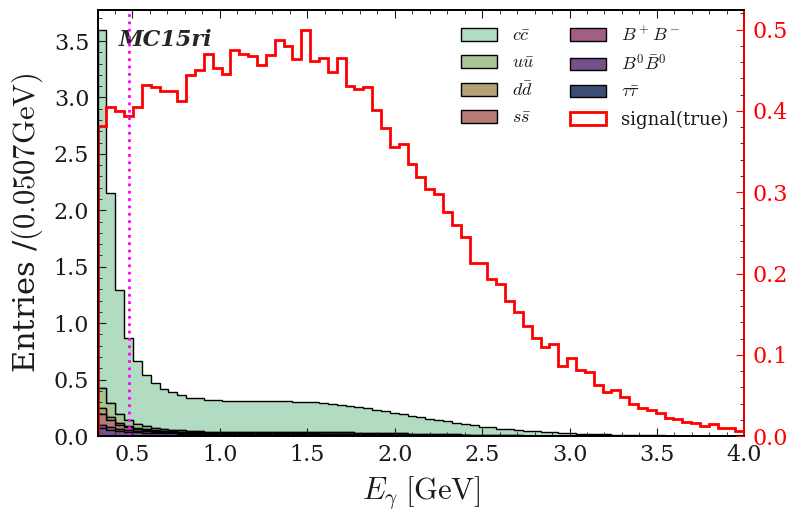

In [12]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'gamma_E'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.3,4.0)
# xrange = (1.8,1.9)
nbins = 73
xlabel = r"$E_{\gamma}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter+=' && Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC15ri_antiKstar_pre_ext_Eg.png")

[ 11533.  13828.  15650.  17385.  18921.  20403.  21520.  23161.  25828.
  29918.  34220.  39147.  44742.  49792.  56614.  63010.  71879.  81917.
  94880. 111604. 125419. 126690. 115805. 100054.  87400.  78199.  70741.
  64442.  59046.  55381.  51763.  48094.  45036.  42439.  40071.  37643.
  35947.  34204.  32710.  31550.  30738.  30541.  30206.  30574.  30045.
  29871.  29628.  29303.  29284.  29346.  29196.  29234.  28666.  28357.
  28807.  28857.  28244.  28358.  27902.  27851.  27712.  27826.  27594.
  27253.  27482.  26973.  26823.  26946.  26637.  25901.]
fitst_bin_entries=11533.0


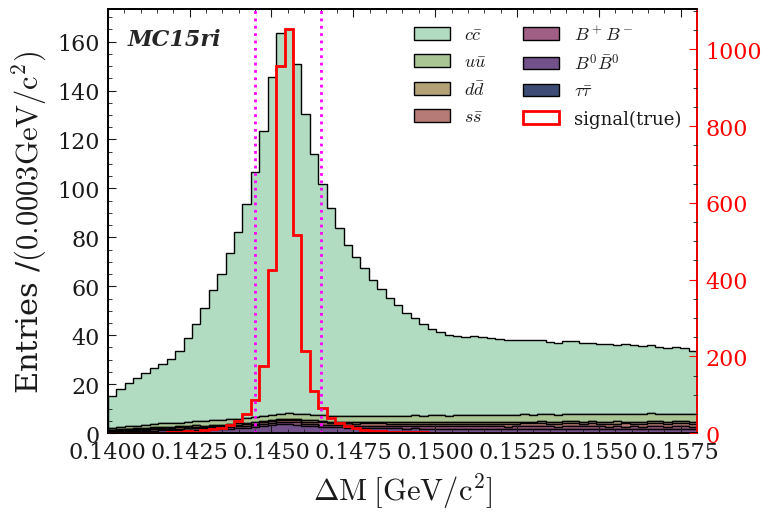

In [13]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_delM'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.14,0.158)
# xrange = (1.8,1.9)
nbins = 70
xlabel = "$\mathrm{\Delta M}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter+=' && Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=(2.0103-1.8648) - 0.001,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=(2.0103-1.8648) + 0.001,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_delM.png')

[32323. 32787. 33006. 32929. 33298. 33308. 33576. 33886. 33617. 33653.
 33926. 33372. 33462. 33638. 33111. 33109. 32548. 32729. 32574. 32370.
 32918. 32197. 32315. 32271. 32234. 32033. 31772. 31373. 31568. 32045.
 31790. 32432. 33364. 34790. 36140. 39078. 42181. 46237. 50987. 54388.
 56534. 55810. 54494. 52712. 50650. 48187. 46055. 44343. 42768. 41288.
 40210. 39357. 38586. 37723. 36657. 36157. 35670. 35523. 34649. 34784.
 34065. 33790. 33700. 33360. 33156. 33044. 33272. 33047. 33149. 33228.
 33390. 33692. 34048. 34085. 34886. 34790. 35154. 34860. 34576. 35235.]
fitst_bin_entries=32323.0


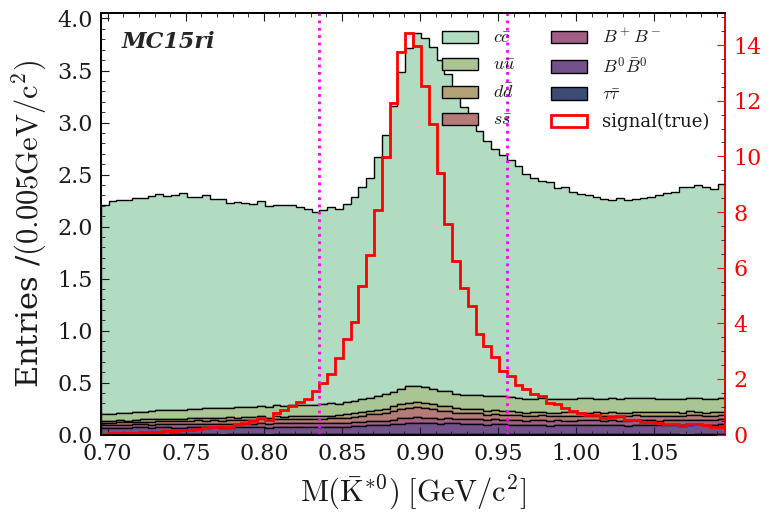

In [14]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'antiKstar_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (0.89555 - 0.20, 0.89555+0.20)# xrange = (1.8,1.9)
nbins = 80
xlabel = r"$\mathrm{M(\bar{K}^{*0})}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter += '&& Dstarp_isSignal==1'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=0.89555 - 0.06,  color='magenta', linestyle='dotted',lw=2)
plt.axvline(x=0.89555 + 0.06,  color='magenta', linestyle='dotted',lw=2)

plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_antiKstar_M.png')

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 2.520e+03 2.543e+03 2.531e+03 2.498e+03
 2.492e+03 2.524e+03 2.407e+03 2.397e+03 2.494e+03 2.383e+03 2.357e+03
 2.328e+03 2.261e+03 2.286e+03 2.242e+03 2.201e+03 2.130e+03 2.085e+03
 1.998e+03 1.921e+03 1.848e+03 1.864e+03 1.789e+03 1.757e+03 1.637e+03
 1.561e+03 1.495e+03 1.491e+03 1.402e+03 1.350e+03 1.233e+03 1.217e+03
 1.150e+03 1.079e+03 9.770e+02 9.510e+02 8.590e+02 7.730e+02 6.800e+02
 6.010e+02 5.450e+02 4.930e+02 4.080e+02 3.350e+02 2.270e+02 1.330e+02
 5.600e+01 1.900e+01 2.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]
fitst_bin_entries=0.0


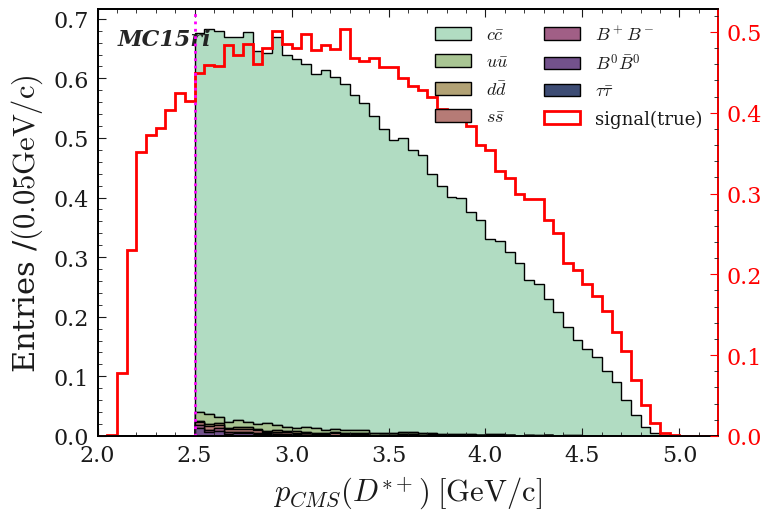

In [19]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  
var = 'Dstarp_CMS_p'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

scale = 1
xrange = (2, 5.2)
# xrange = (1.8,1.9)
nbins = 64
xlabel = "$p_{CMS}(D^{*+})$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c")


# half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# # base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# # base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
# base_filter += '&& Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
ax2.tick_params(colors='red')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

plt.axvline(x=2.5,  color='magenta', linestyle='dotted',lw=2)
plt.tight_layout()
plt.savefig('MC15ri_antiKstar_pre_pCMS.png')

[1594. 1815. 1791. 1924. 1946. 2020. 2129. 1969. 2012. 1997. 1937. 1793.
 1747. 1743. 1655. 1624. 1451. 1346. 1346. 1279. 1236. 1132. 1105. 1077.
  983.  973.  920.  896.  843.  780.  784.  715.  674.  656.  651.  625.
  569.  553.  535.  521.  480.  464.  430.  417.  432.  402.  397.  385.
  326.  336.  359.  304.  302.  288.  261.  278.  248.  232.  232.  242.]
fitst_bin_entries=1594.0


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


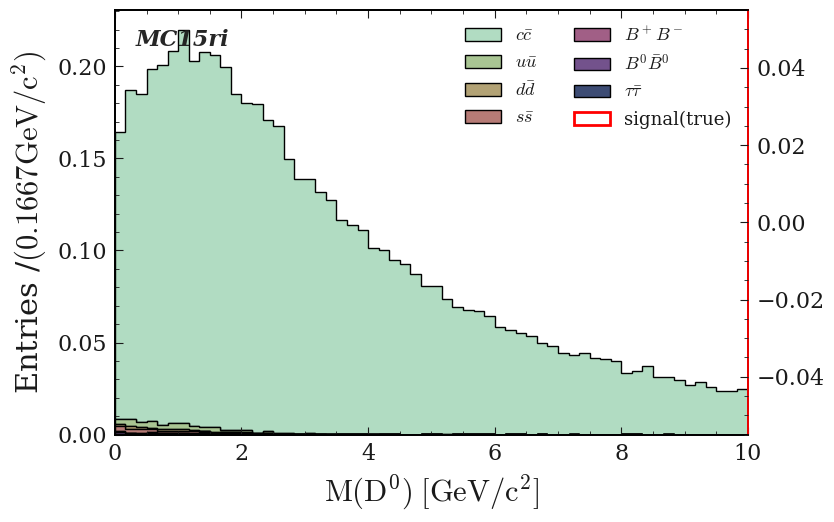

In [20]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  

var = 'D0_flightDistanceErr'
var2 = 'D0_flightDistance'

data  = [pd_taupair[var2]/pd_taupair[var], pd_mixed[var2]/pd_mixed[var], pd_charged[var2]/pd_charged[var],pd_ssbar[var2]/pd_ssbar[var], pd_ddbar[var2]/pd_ddbar[var],pd_uubar[var2]/pd_uubar[var], pd_ccbar[var2]/pd_ccbar[var]]  

scale = 1
xrange = (0.0,10)
# xrange = (1.8,1.9)
nbins = 60
xlabel = "$\mathrm{M(D^0)}$"


fig = plt.figure()

MC_stack_plot_density(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="GeV/c^2")


half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_phi_*.root'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
# base_filter='D0_M>1.68 && D0_M<2.05 && Dstarp_isSignal==1'
base_filter += '&& Dstarp_isSignal==1'

pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)
ax = plt.gca()
ax2 = ax.twinx()
plt.hist(pd_half_1_sigMC[var2]/pd_half_1_sigMC[var], bins=np.linspace(*xrange,nbins+1),histtype='step',color='r',density=True,lw='2',label='signal(true)');
ax2.spines['right'].set_color('r')
fig.legend(loc='upper right',prop={'size':13}, ncol = 2,  bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [422]:
#labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
# labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']

# xrange = (1.68, 2.05)
# xbins = np.linspace(*xrange,51)
# colors=b2helix(len(labels))
# data_list=dict()
# signal_variables = ["D0_M"]
# scale = 0.5

# for var in signal_variables:
# #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     print(var)
#     mixed_bkg = {var : pd_mixed[var] }
#     charged_bkg = {var : pd_charged[var] }
#     ccbar_bkg = {var : pd_ccbar[var] }
#     uubar_bkg = {var : pd_uubar[var] }
#     ddbar_bkg = {var : pd_ddbar[var] }
#     ssbar_bkg = {var : pd_ssbar[var] }
#     taupair_bkg = {var : pd_taupair[var] }
    
    
#     #print(mixed_bkg)
# #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     # data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data  = [taupair_bkg[var], mixed_bkg[var], charged_bkg[var],ssbar_bkg[var], ddbar_bkg[var],uubar_bkg[var], ccbar_bkg[var]]  

#     weights = make_data_weight(data, scale)
# #     for labeling in labels:

    
#     plt.hist(data, bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black', weights = weights)
    
# #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
#     ax = plt.gca()
#     ax.bar(
#                 x = bin_mids,
#                 height=2 * np.sqrt(sum_w2),
#                 width=bin_width,
#                 bottom=sum_w - np.sqrt(sum_w2),
#                 color="black",
#                 hatch="///////",
#                 fill=False,
#                 lw=0,
#                 label="MC stat. unc."    
#     )
#     # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width , box.height])

#     # Put a legend to the right of the current axis
#     # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend(loc='upper right',prop={'size':13}, ncol = 2)
        
#     watermark(t="",logo="MC15ri")
# #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

#     n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

#     ax.set_xlim(*xrange)
#     ax.set_ylim(0,sum_w[0]*1.2)
#     # ax.set_ylim(0,600)

#     plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
#     width = xe[1]-xe[0]
#     plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
#     plt.show()
#     plt.clf()

In [10]:
pd_all = pd.concat([pd_ccbar,
                    pd_uubar,
                    pd_ddbar,
                    pd_ssbar,
                    pd_charged,
                    pd_mixed,
                    pd_taupair], ignore_index=True)

In [70]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, cut):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        temp_cut = cut + str(cut_value) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [71]:
def calculate_eff( bkg_pd, sig_pd, cut_list, cut):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut = cut + str(cut_value) 

        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6)
        eff_list.append(eff)    
    
    return eff_list

In [72]:
def calculate_purity( bkg_pd, sig_pd, cut_list, cut):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        #temp_cut = 'gamma_E > ' + str(cut_value) 
        temp_cut =  cut +  str(cut_value) 
        
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dstarp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [84]:
def plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list, xlabel ,offset=85):


    fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches    
    par1 = host.twinx()
    # par2 = host.twinx()

    #host.set_xlim(2, 3.5)
    # host.set_ylim(0, 2)
    # par2.set_ylim(0, 4)
    #par1.set_ylim(0,0.16 )
    # par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                            # offset=(offset, 0))
    # par2.axis["right"].toggle(all=True)

    host.set_xlabel(xlabel)
    host.set_ylabel("FOM")
    par1.set_ylabel("Efficiency")
    # par2.set_ylabel("Purity")

    # color1 = plt.cm.viridis(0)
    # color2 = plt.cm.viridis(0.5)
    # color3 = plt.cm.viridis(.9)
    color1 = 'r'
    color2 = 'g'
    color3 = 'b'

    p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
    p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
    # p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

    
    # lns = [p1, p2, p3]
    lns = [p1, p2]

    host.legend(handles=lns, loc='best')
    # right, left, top, bottom
    offset = offset
    # par2.spines['right'].set_position(('outward', offset))

    # no x-ticks                 
    # par2.xaxis.set_ticks([])

    # Sometimes handy, same for xaxis
    # par2.yaxis.set_ticks_position('right')

    # Move "Velocity"-axis to the left
    # par2.spines['left'].set_position(('outward', 60))
    # par2.spines['left'].set_visible(True)
    # par2.yaxis.set_label_position('left')
    # par2.yaxis.set_ticks_position('left')

    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    # par2.yaxis.label.set_color(p3.get_color())

    plt.title(r'$D^0 \to \bar{K}^{*0} \gamma$')
    # plt.axvline(x=2.45,  color='orange', linestyle='dotted')

    # Adjust spacings w.r.t. figsize
    fig.tight_layout()

In [14]:
def calculate_FOM_3D(bkg_pd, sig_pd, grid_list, scale_factor, cut_x, cut_y, cut_z):
 
    FOM_list = list()
    
    for points_3d in grid_list:
        
        points_3d_x, points_3d_y, points_3d_z =  points_3d[0], points_3d[1], points_3d[2]
    
        temp_cut = cut_x + str(points_3d_x) + ' & ' +  cut_y + str(points_3d_y) + ' & ' + cut_z + str(points_3d_z) 
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)    
        
        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        # print(FOM)
        FOM_list.append(FOM)    
        
    return FOM_list

In [11]:
# base_file_loc = '/media/jykim/T7/storage/01_recon/v26_sigbkg_pre_ext/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_pre_1ab_onlysig/'

sigMC_file_loc = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'

# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.001'
# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9 '
base_filter=' D0_M>1.68 && D0_M<2.05 && abs(Phi_M - 1.0195) < 0.011 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && abs(Dstarp_delM-(2.0103-1.8648))<0.001 && Dstarp_CMS_p>2.5'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06  && Dstarp_CMS_p>2.5'

base_filter += '&& nSigCascDcyBr_0==0'
base_filter += '&& Dstarp_isSignal==1'

# base_filter += '&& gamma_E>0.45'

# variables=['D0_M','D0_cosHel_0','Phi_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','gamma_E']
tree='antiKstar'

pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)
print(len(pd_phigamma_sigMC))

7215


In [12]:
half_1_sigMC = '/media/jykim/T7/storage/01_recon/phi/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_phi.root'
half_1_sigMC = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_pre_signalMC_recon_mdst_antiKstar_*.root'

# base_filter='D0_M>1.8 && D0_M<1.9  && abs(Phi_M - 1.0195)< 0.011 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter='D0_M>1.8 && D0_M<1.9'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555) < 0.06 && Dstarp_CMS_p>2.5'
# base_filter += '&& gamma_E>0.45'
base_filter += '&& Dstarp_isSignal==1'


pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)


scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )
print(scale_factor)

0.12743972445464982


In [15]:
X, Y, Z = np.mgrid[0.3:0.8:51j, 0.005:0.030:26j, 0.0004:0.001:13j]
a = zip(X.ravel(), Y.ravel(), Z.ravel())
A_list = list(a)

grid_list = A_list
cut_x = 'gamma_E > '
cut_y = 'Belle2Pi0Veto_75MeV > '
cut_z = 'abs(Dstarp_delM - 0.1455) < '

scale_factor=scale_factor

FOM_phig_list = calculate_FOM_3D(pd_all,pd_half_1_sigMC, grid_list ,scale_factor, cut_x,  cut_y, cut_z )


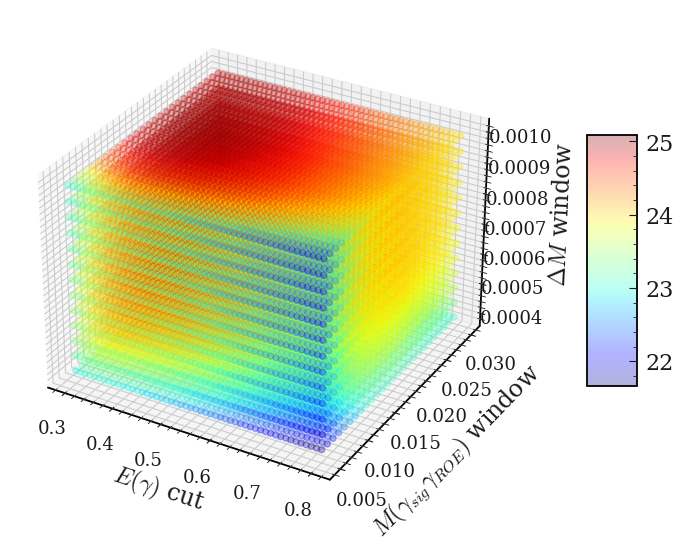

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# scat = ax.scatter(X, Y, Z, c=T.flatten(), alpha=0.5)
scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.3, cmap = 'jet')
# scat = ax.scatter(X, Y, Z, c=FOM_phig_list, alpha=0.5)

fig.colorbar(scat, shrink=0.5, aspect=5 , pad = 0.1)

ax.set_xlabel(r'$E(\gamma)$ cut',fontsize=17)
ax.set_ylabel(r'$M(\gamma_{sig}\gamma_{ROE})$ window',fontsize=17)
ax.set_zlabel(r'$\Delta M$ window',fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=13)

# ax.ticklabel_format(axis = 'z',  style='sci', scilimits = (0,1))
# ax.dist = 10
ax.xaxis.labelpad=8
ax.yaxis.labelpad=12
ax.zaxis.labelpad=13.5


plt.tight_layout()
plt.savefig('Eg_Mgg_delM_antiKstar_opt.png')

plt.show()

In [17]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = A_list[max_index]
print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=25.0898114013016, cut value=(0.33999999999999997, 0.021, 0.00075)


max=15.810051544280462, cut value=0.43


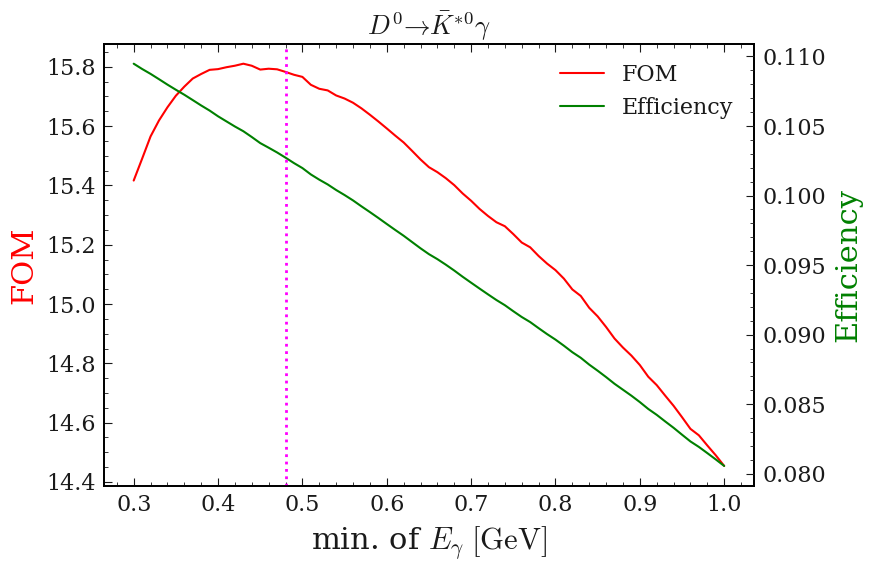

In [88]:
FOM_cut_list = np.linspace(0.3,1.0,71)
cut = 'gamma_E > '

FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.48,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_antiKstar_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=6.35250766607138, cut value=0.013000000000000001


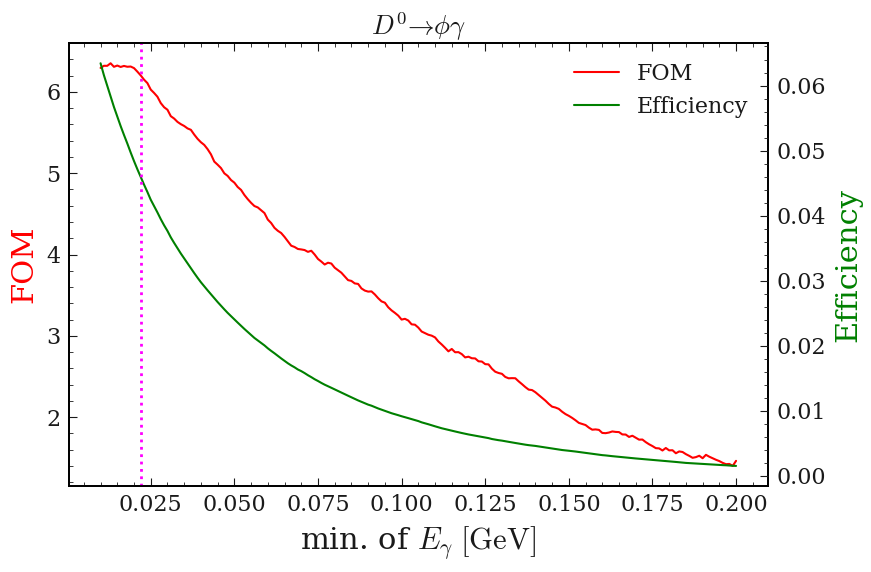

In [431]:
FOM_cut_list = np.linspace(0.01,0.2,191)
# cut = 'Belle2Pi0Veto_75MeV > '
cut = 'Belle2Pi0Veto > '
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.022,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=6.775851521105216, cut value=0.025


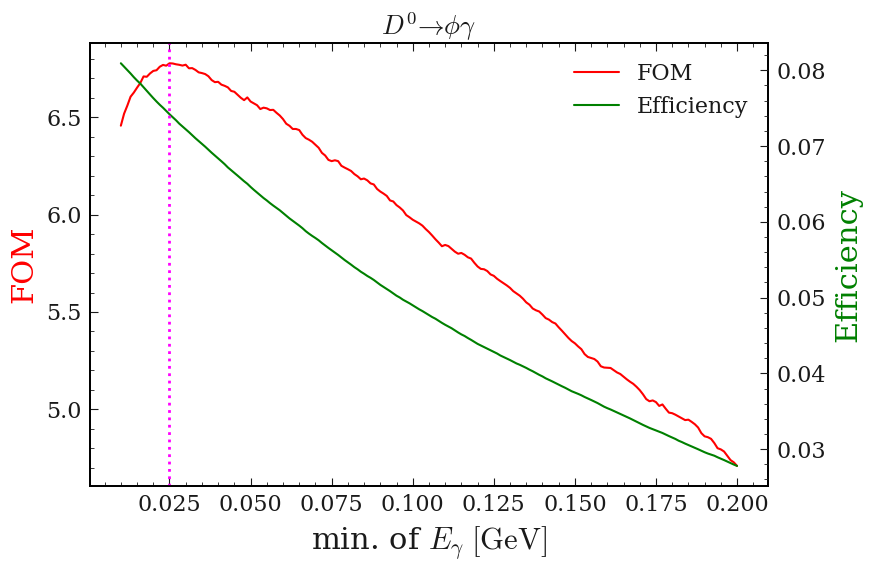

In [436]:
FOM_cut_list = np.linspace(0.01,0.2,191)
# cut = 'Belle2Pi0Veto_75MeV > '
cut = 'Belle2Pi0Veto_50MeV > '
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.025,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))

max=6.379008235937961, cut value=0.023


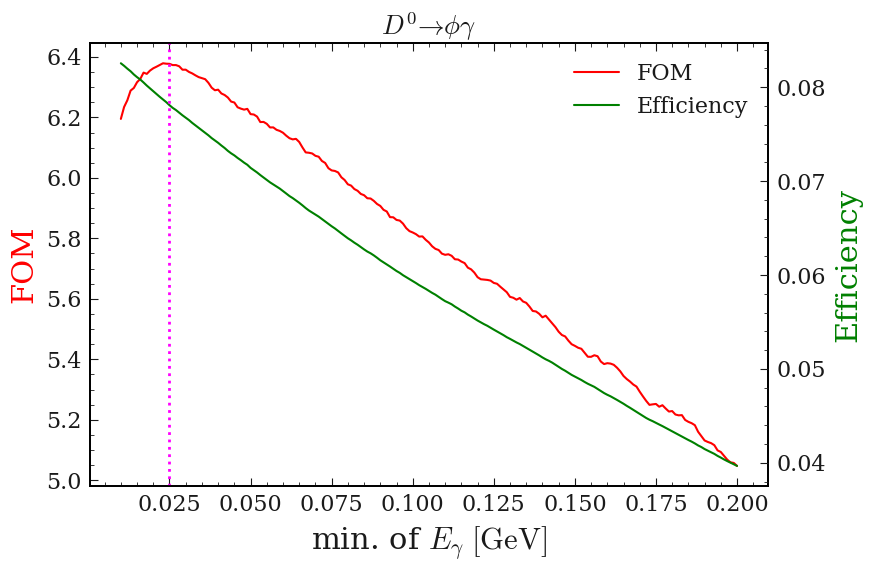

In [435]:
FOM_cut_list = np.linspace(0.01,0.2,191)
cut = 'Belle2Pi0Veto_75MeV > '
# cut = 'Belle2Pi0Veto_50MeV > '
FOM_phig_list = calculate_FOM(pd_all,pd_half_1_sigMC, FOM_cut_list,scale_factor, cut = cut  )
purity_phig_list = calculate_purity(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)
eff_phig_list = calculate_eff(pd_all, pd_half_1_sigMC, FOM_cut_list, cut =  cut)

plot_FOM_eff_purity(FOM_cut_list, FOM_phig_list, eff_phig_list, purity_phig_list,xlabel=r"min. of $E_{\gamma}\; [\mathrm{GeV}]$",offset=85)

max_index= FOM_phig_list.index(max(FOM_phig_list))
max_FOM = max(FOM_phig_list)
argmax_FOM = FOM_cut_list[max_index]
plt.axvline(x=0.025,  color='magenta', linestyle='dotted',lw=2)

plt.savefig("MC1tri_rho_after_pre_ext_Eg_FOM.png")


print('max=' + str(max_FOM) + ', cut value=' + str(argmax_FOM))